# introduction

In [1]:
#| default_exp introduction

In [2]:
#| hide
from nbdev.showdoc import *

## What is `reproduce.work`?
`reproduce.work` is a set of standards, software, and people aligned for the purpose of scientific reproducibility. These components are all independent but work most effectively together:

1. A **set of [standards]()** for the structure of a computationally reproducible project for scientific publishing.
2. A set of **software development tools** (that currently works with Python, Jupyter, and VSCode based workflows) which make it easy to create, validate, and publish reproducible projects. 
    - This tooling is based on [Docker](https://www.docker.com/) and allows you to use any code and nearly program for your work, while ensuring that your work is reproducible.
    - We currenlty support authorship in any text-based, markdown, or notebook based environment
    - 🖋️ seemless, *full-powered* LaTeX support (not just MathJax, folks)
    - 🔁 auto-compiled PDFs, triggered by file changes
    - 🧰 cross-platform reproducibility
3. **A group of people** who support the devlopment of these tools and the adoption of these standards.


### Philosophy
The objective of this software is to facilitate a version open science with reproducibility of computational results in published scientific work. The software is developed to integrate with existing computing paradigms and development workflows, including any docker-targeted build system. The goal is to accomodate the vast space of computation and logic that counts as "scientific computing" while providing a framework that constrains the core essence of scientific publishing to an ontology that facilitates and encourages reproducibile practices for humans both producing and consuming science.

<!--
### Long-term prospects

reproduce.work has published the v0.0.1 release of its software. This includes an open-sourcing of the key standards that facilitate our vision of open science, which can be seen online and will always remain free. Our intention is for our software to work at full capacity without cost for those using self-hosted storage and compute resources.

In the future, we may develop cloud-based services that provide turn-key solution for those who want the convenience of data versioning, verification, and perpetual storage without the hassle of self-hosting. Such services may be available for a fee. However, as mentioned, core standards and software will always remain free and open source.
-->

## Installation

Requires Docker or suitable drop-in replacement such as OrbStack. See [Docker requirement](https://reproduce.work/installation) for more details.

### Python-based workflow


To incorporate reproduce.work elements into your Python-based workflow, simply install the package or include it in your `requirements.txt` and rebuild your project.

```sh
pip install reproduce_work
```

In [4]:
import os
os.environ["REPROWORKDIR"] = "reproduce"
from reproduce_work import register_notebook

## How to use

### Getting started

Generate configuration at beginning of your project

In [5]:
register_notebook('00_introduction.ipynb')

╔ω: Registered notebook https://github.com/reproduce-work/reproduce-work/blob/main/nbs/00_introduction.ipynb in reproduce/config.toml


Run code to analyze data and generate figures

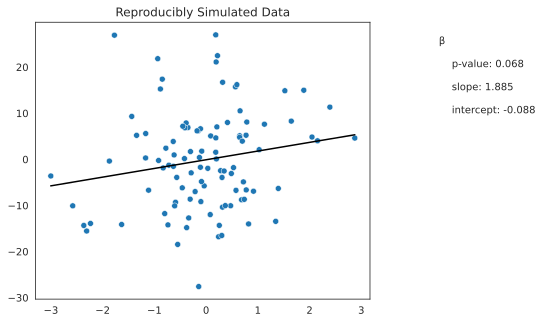

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

%config InlineBackend.figure_formats = ['svg']
plt.rcParams['figure.figsize'] = [6, 5]

random_state = np.random.RandomState(552)

# Generate data
x = random_state.normal(size=100)
y = 0.5*x + random_state.normal(scale=10, size=100)

# Plot data with seaborn
sns.set_style('white')

# compute slope and stats
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# plot x-y scatter data
x_y_plot = sns.scatterplot(x=x, y=y)

# plot best fit line
x_y_plot.plot(x, intercept + slope*x, color='black')

# Compute p-value of slope 
# render p-value with 3 decimal places and no scientific notation
p_value_str = f'{p_value:.3f}'

# add p-value and slope to plot
x_y_plot.text(x=4.5, y=25, s='β')
x_y_plot.text(x=4.75, y=20, s=f'p-value: {p_value_str}')
x_y_plot.text(x=4.75, y=15, s=f'slope: {slope:.3f}')
x_y_plot.text(x=4.75, y=10, s=f'intercept: {intercept:.3f}')

# Set title
x_y_plot.set_title('Reproducibly Simulated Data')

# save figure
plt.savefig('img/reproducible_plot.svg', bbox_inches='tight')
_ = x_y_plot

### Decide which data, figures, and files to save for publication.

There are two primary types of publishable data:

- data assignments
    - defined via: `reproduce_work.publish_data`
    - Designed to standardize data management and facilitate data validation
- file assignments
    - defined via: `reproduce_work.publish_file`
    - Designed to standardize file management and facilitate file validation, allowing for reproducible workflows for arbitrarily complex data structures



In [7]:
from reproduce_work import publish_data, publish_file

In [8]:
publish_data(p_value_str, "p_value_str", metadata={
    'description': 'The p-value of the coefficient on the slope of the linear regression line.',
})

╔ω: Updated p_value_str in reproduce/pubdata.toml


In [9]:
publish_data(x, "x", metadata={
    'description': 'The simulated X data',
    'units': 'kilograms'
})

╔ω: Updated x in reproduce/pubdata.toml


In [10]:
publish_data(y, "y", metadata={
    'description': 'The simulated Y data',
    'units': 'meters'
})

╔ω: Updated y in reproduce/pubdata.toml


In [11]:
#document_image_dir = 
publish_file('img/reproducible_plot.svg', metadata={
    'description': 'A plot of X vs Y',
})

<IPython.core.display.Javascript object>

In [12]:
import numpy as np
import pandas as pd
import toml

sample_data = {
    'name': 'John',
    'age': 28,
    'is_student': False,
    'scores': [85, 90, 78, 92],
    'birthday': pd.Timestamp('2000-01-01'),
    'matrix': np.array([[1, 2], [3, 4]]),
    'df': pd.DataFrame({
        'A': [1, 2, 3],
        'B': ['a', 'b', 'c'],
        'date': [pd.Timestamp('2022-01-01'), pd.Timestamp('2022-01-02'), pd.Timestamp('2022-01-03')]
    }),
    'nested_dict': {
        'key1': 'value1',
        'sub_dict': {
            'sub_key': 'sub_value'
        }
    },
    'none_value': None
}

def toml_dump(val):
    return toml.loads(toml.dumps({'val':val}))['val']

toml_dump(sample_data )

{'name': 'John',
 'age': 28,
 'is_student': False,
 'scores': [85, 90, 78, 92],
 'birthday': "Timestamp('2000-01-01 00:00:00')",
 'matrix': [['1', '2'], ['3', '4']],
 'df': ['A', 'B', 'date'],
 'nested_dict': {'key1': 'value1', 'sub_dict': {'sub_key': 'sub_value'}}}

In [13]:
from reproduce_work import read_base_config
base_config = read_base_config()
with open(base_config['repro']['files']['dynamic'], 'r') as f:
    print(f.read())

[x]
description = "The simulated X data"
units = "kilograms"
published_url = "https://github.com/reproduce-work/reproduce-work/blob/main/reproduce/pubdata.toml"
generating_script = "https://github.com/reproduce-work/reproduce-work/blob/main/nbs/00_introduction.ipynb"
type = "data"
timestamp = "2023-12-13T00:13:00.889466"
content_hash = "38f13b81a58a7d931600e917d77dfe8f"
timed_hash = "f7ee6994742be31a210aee4d41ce2e69"
python_version = "3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:23:23)  [GCC 10.3.0]"
platform_info = "Linux-6.5.13-orbstack-00115-g011f8a6f3e5f-aarch64-with-glibc2.35"

[y]
description = "The simulated Y data"
units = "meters"
published_url = "https://github.com/reproduce-work/reproduce-work/blob/main/reproduce/pubdata.toml"
generating_script = "https://github.com/reproduce-work/reproduce-work/blob/main/nbs/00_introduction.ipynb"
type = "data"
timestamp = "2023-12-13T00:13:01.632969"
content_hash = "f8945d4c03988df0cd59c181035e86a9"
timed_hash = "7db28dc3c7cfb

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()